In [1]:
import datetime
import os.path
import numpy as np
from qopt.examples.ff_benchmarking.singlet_triplet_setup import \
    create_simulators, create_optimizer, EPS_MIN, N_TIME_STEPS
from qopt.analyser import Analyser
from qopt.data_container import DataContainer


def time_stamp():
    time = str(datetime.datetime.now())[:-7]
    new_time = time[:10] + '-' + time[11:13] + '-' + time[14:16] \
               + '-' + time[17:19]
    return new_time


n_runs = 50

np.random.seed(0)
initial_conditions = EPS_MIN * np.random.rand(N_TIME_STEPS, n_runs)

path = r'Z:\SimulationData\ff_derivative\lindblad_vs_ff'

In [7]:
simulator_ff, simulator_l, simulator_syst, sim_ff_only = create_simulators()

syst_opt = create_optimizer(simulator_syst)
l_opt = create_optimizer(simulator_l, max_iterations=300)
ff_opt = create_optimizer(simulator_ff, max_iterations=300)
ff_only_opt = create_optimizer(sim_ff_only)

In [3]:
l_data = DataContainer(storage_path=path)
for i in range(n_runs):
    l_result =  l_opt.run_optimization(
        initial_control_amplitudes=np.expand_dims(
            initial_conditions[:, i], axis=1
        )
    )

    l_data.append_optim_result(l_result)

l_analyser = Analyser(data=l_data)
l_file = r'lindblad' + time_stamp()
l_data.to_pickle(filename=os.path.join(path, l_file))

In [8]:
ff_data = DataContainer(storage_path=path)
for i in range(n_runs):
    ff_result =  ff_opt.run_optimization(
        initial_control_amplitudes=np.expand_dims(
            initial_conditions[:, i], axis=1
        ))

    ff_data.append_optim_result(ff_result)

ff_analyser = Analyser(data=ff_data)
ff_file = r'filter_functions' + time_stamp()
ff_data.to_pickle(filename=os.path.join(path, ff_file))

### Analysis

In [2]:
file = r'lindblad2020-08-20-18-15-40'

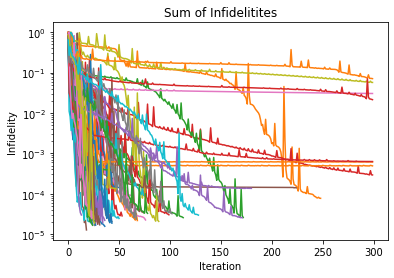

In [10]:
loaded_data = DataContainer.from_pickle(filename=os.path.join(path, file))
loaded_analyser = Analyser(loaded_data)
fig, ax = loaded_analyser.plot_absolute_costs()
fig.savefig(fname=os.path.join(path, file + '.png'))


In [9]:
file = r'filter_functions2020-08-20-18-46-25'

### Debugging

In [ ]:
# start with the cost fktn weights in the simulator

simulator_ff, simulator_l, simulator_syst, sim_ff_only = create_simulators(
    cost_fkts_weights=[1, 1e3]
)

syst_opt = create_optimizer(simulator_syst)
l_opt = create_optimizer(simulator_l, max_iterations=300)
ff_opt = create_optimizer(simulator_ff, max_iterations=300)
ff_only_opt = create_optimizer(sim_ff_only)

np.random.seed(0)
initial_conditions = EPS_MIN * np.random.rand(10, 1)

In [ ]:
sim_result = ff_opt.run_optimization(initial_conditions)

In [ ]:
# now in the optimizer

simulator_ff, simulator_l, simulator_syst, sim_ff_only = create_simulators()

ff_opt = create_optimizer(simulator_ff, max_iterations=300,
                          cost_fkts_weights=[1, 1e3])

In [ ]:
opt_results = ff_opt.run_optimization(initial_conditions)

In [ ]:
sim_result.final_parameters - opt_results.final_parameters

In [ ]:


data = DataContainer()
result = syst_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()


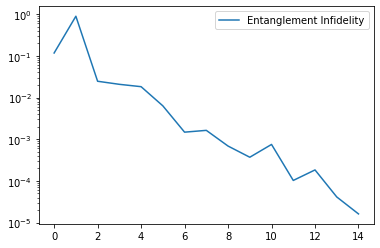

In [5]:
np.random.seed(0)

initial_conditions = EPS_MIN * np.random.rand(10, 1)
data = DataContainer()
result = l_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()

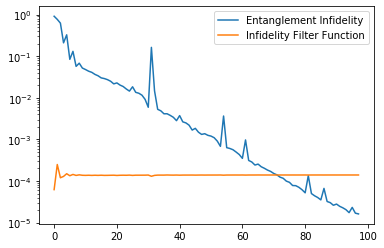

In [10]:
np.random.seed(0)
initial_conditions = EPS_MIN * np.random.rand(10, 1)
data = DataContainer()
result = ff_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()

In [ ]:
np.random.seed(0)
initial_conditions = EPS_MIN * np.random.rand(10, 1)
data = DataContainer()
result = ff_only_opt.run_optimization(
    initial_control_amplitudes=initial_conditions)

data.append_optim_result(result)
analyser = Analyser(data=data)
analyser.plot_costs()

In [ ]:
preoptimized = result.final_parameters